# Animal Ai

## 1. Setup and load data

### 1.1 Install dependencies and setup

In [2]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip list

Package                      Version
---------------------------- ----------------
absl-py                      1.4.0
accelerate                   0.22.0
aggdraw                      1.3.18
aiofiles                     23.2.1
aiohttp                      3.8.5
aiosignal                    1.3.1
altair                       5.0.1
annotated-types              0.5.0
antlr4-python3-runtime       4.9.3
anyio                        3.7.1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.5.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
audioread                    3.0.1
av                           11.0.0
Babel                        2.13.1
backoff                      2.2.1
bcc                          0.18.0
beautifulsoup4               4.12.2
bleach                       6.1

In [1]:
import tensorflow as tf
import os

2024-05-23 15:16:50.084035: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-23 15:16:50.089479: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 15:16:50.120482: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 15:16:50.120515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 15:16:50.121307: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
for folder in os.listdir('animals/animals'):
    print(folder, len(os.path.join('animals/animals', folder)))

dog 19
kangaroo 24
squid 21
cockroach 25
crow 20
gorilla 23
reindeer 24
butterfly 25
horse 21
swan 20
parrot 22
snake 21
caterpillar 27
okapi 21
boar 20
shark 21
squirrel 24
seahorse 24
fox 19
zebra 21
rat 19
hyena 21
whale 21
woodpecker 26
lobster 23
hippopotamus 28
hornbill 24
goose 21
antelope 24
beetle 22
pig 19
turkey 22
bear 20
dragonfly 25
raccoon 23
goldfish 24
porcupine 25
possum 22
deer 20
panda 21
cat 19
ox 18
rhinoceros 26
wolf 20
sheep 21
octopus 23
koala 21
wombat 22
fly 19
grasshopper 27
orangutan 25
lion 20
hedgehog 24
bison 21
eagle 21
coyote 22
oyster 22
elephant 24
moth 20
tiger 21
hare 20
dolphin 23
sandpiper 25
seal 20
pelecaniformes 30
turtle 22
sparrow 23
lizard 22
goat 20
pigeon 22
donkey 22
cow 19
jellyfish 25
otter 21
ladybugs 24
hamster 23
flamingo 24
leopard 23
owl 19
mosquito 24
hummingbird 27
badger 22
mouse 21
starfish 24
chimpanzee 26
duck 20
crab 20
bee 19
penguin 23
bat 19


### 1.2 Load Data

In [4]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [6]:
data = tf.keras.utils.image_dataset_from_directory('animals/animals')

Found 5400 files belonging to 90 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
#Image represented as numpy array
batch[0]

array([[[[251.       , 249.       , 250.       ],
         [252.       , 250.       , 251.       ],
         [252.48047  , 250.48047  , 251.48047  ],
         ...,
         [253.17758  , 252.81535  , 247.09946  ],
         [252.91331  , 253.28143  , 244.64378  ],
         [110.41878  , 109.29285  , 103.92659  ]],

        [[251.       , 249.       , 250.       ],
         [252.       , 250.       , 251.       ],
         [252.48047  , 250.48047  , 251.48047  ],
         ...,
         [254.72806  , 254.72806  , 249.0335   ],
         [252.47153  , 251.33815  , 243.053    ],
         [ 92.99927  ,  88.91222  ,  84.27252  ]],

        [[251.       , 249.       , 250.       ],
         [252.       , 250.       , 251.       ],
         [252.48047  , 250.48047  , 251.48047  ],
         ...,
         [253.8176   , 253.5586   , 247.88927  ],
         [240.68668  , 237.48746  , 229.81242  ],
         [ 76.2336   ,  67.2052   ,  64.9534   ]],

        ...,

        [[252.       , 250.       , 25

In [10]:
#Image label
batch[1]

array([12, 83, 25, 20, 75, 63, 58, 48, 67, 47, 34, 74, 33, 19, 44, 89, 85,
       76, 64, 17, 68, 51,  2, 58, 76, 36,  2, 60, 31, 47,  3, 21],
      dtype=int32)

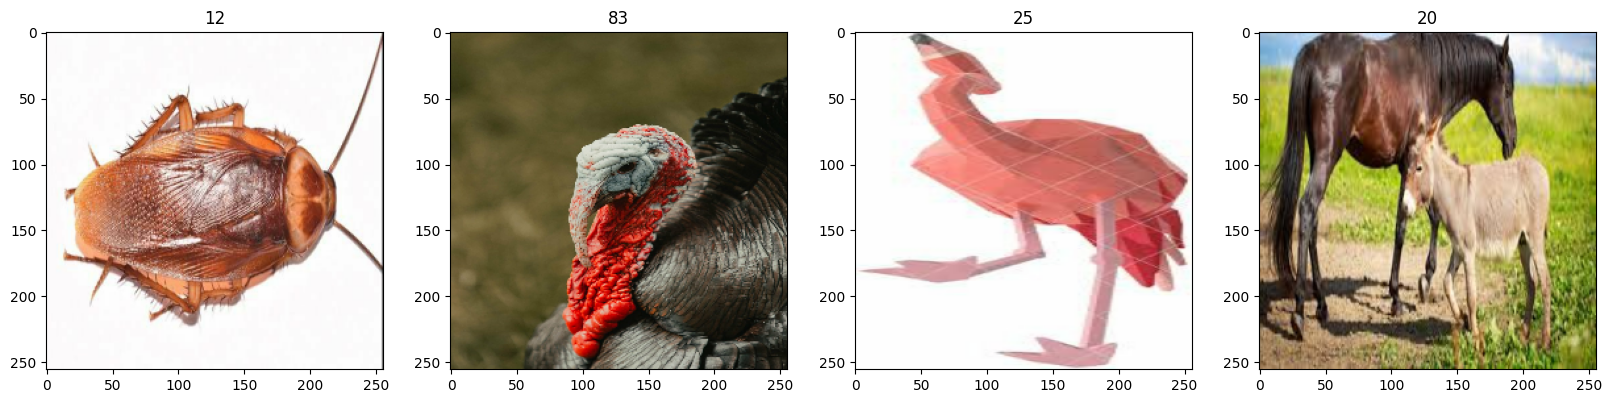

In [11]:
#Example of images
#Each batch label (title) represent a different class of animal(0 cat, 1 dog)
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess data

### 2.1 Scale data

In [12]:
#x represent images and y labels
data = data.map(lambda x,y: (x/255, y))

In [13]:
scaled_iterator = data.as_numpy_iterator()
scaled_batch = scaled_iterator.next()

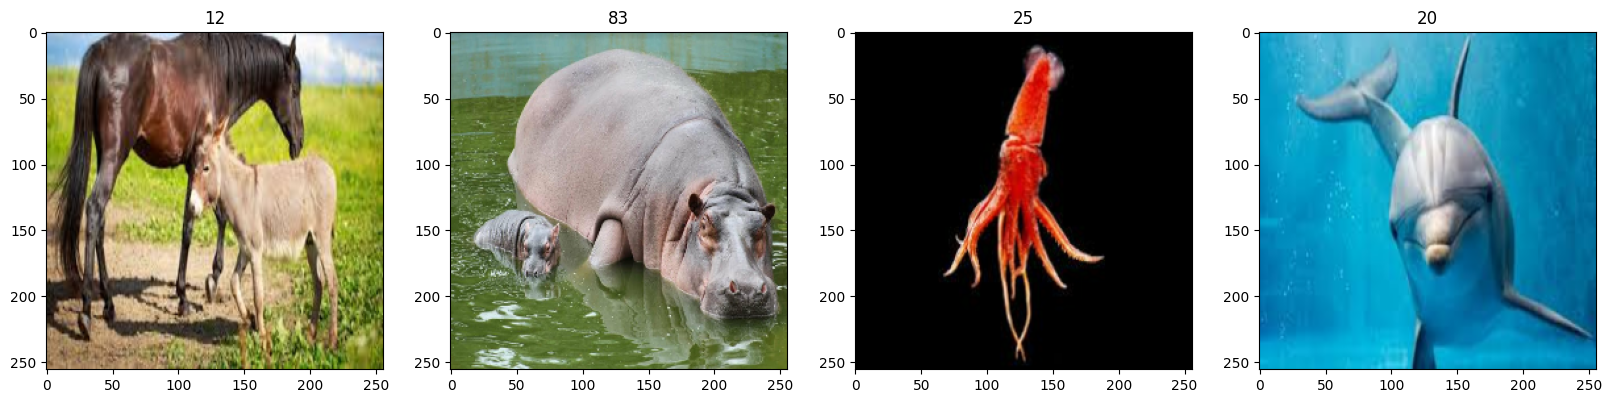

In [14]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split data

In [15]:
#Number of batch for train, test and evaluation
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 3. Deep Model

### 3.1 Build Deep Learning Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
model = Sequential()

In [19]:
#Convolutional block with 16 filter, filter size 3x3pixel, move 1 pixel each time
#activation='relu' convert all negatives output values in 0
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

#Fully connected layers
#model.add(Dense(256, activation='relu'))
#Single output, it's the label of the class(Dog, Cat...)
#model.add(Dense(100, activation='linear'))
model.add(Dense(10, activation='softmax'))

In [20]:
#using the adam optimizer
model.compile('adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2 Train

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
118/118 [==============================] - ETA: 0s - loss: 754.7443 - accuracy: 0.0119

2024-05-22 17:34:35.347561: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


118/118 [==============================] - 67s 554ms/step - loss: 754.7443 - accuracy: 0.0119 - val_loss: 681.9587 - val_accuracy: 0.0119
Epoch 2/20
118/118 [==============================] - 59s 495ms/step - loss: 645.1804 - accuracy: 0.0111 - val_loss: 669.9487 - val_accuracy: 0.0147
Epoch 3/20
 31/118 [======>.......................] - ETA: 31s - loss: 627.2862 - accuracy: 0.0081

### 3.3 Plot Performance

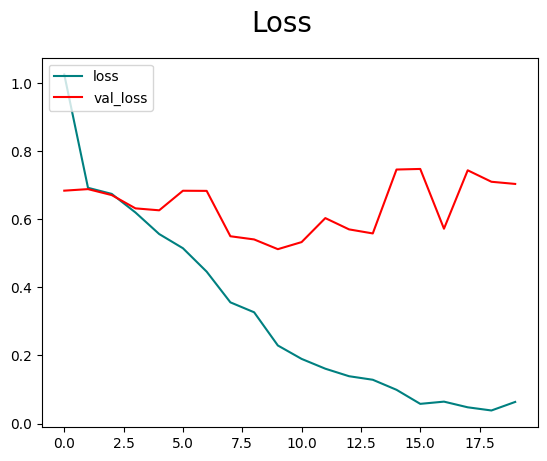

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

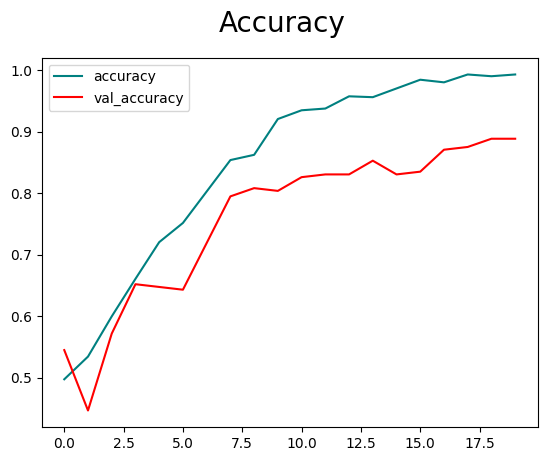

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Evaluating performance

### 4.1 Evaluate

In [63]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 

In [64]:
pre = Precision()
re = Recall()
ba = BinaryAccuracy()

In [65]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    ba.update_state(y, yhat)

1/1 [==============================] - 0s 109ms/step


In [67]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Binary Accuracy: {ba.result().numpy()}')

Precision: 0.8235294222831726, Recall: 0.875, Binary Accuracy: 0.8611111044883728


### 4.2 Testing

In [68]:
import cv2

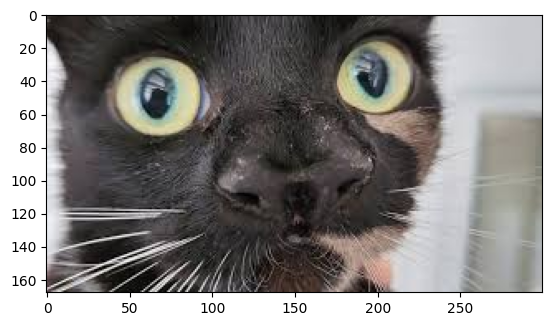

In [83]:
img = cv2.imread('Dataset/animals/test2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

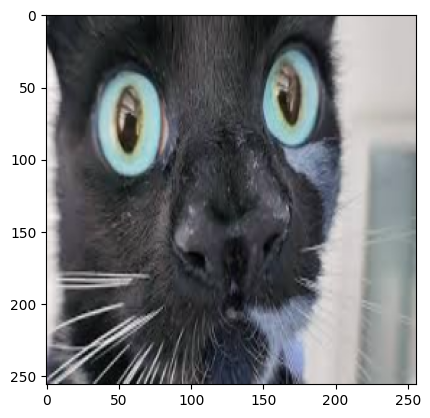

In [84]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [86]:
yhat

array([[1.4140054e-05]], dtype=float32)

In [87]:
if yhat > 0.5:
    print('Predicted: Dog')
else:
    print('Predicted: Cat')

Predicted: Cat


## 5. Save the model

In [90]:
from tensorflow.keras.models import load_model

In [91]:
model.save(os.path.join('models', 'catordogclassifier.h5'))

/home/ale/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('models', 'catordogclassifier.h5'))